In [267]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import calendar
import datetime
import numpy as np
import math

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

In [29]:
pathsA = r'S:\dev.azure.com\tankerkoenig\tankerkoenig-data\prices\2020*\*\202*-prices.csv'
pathsB = r'S:\dev.azure.com\tankerkoenig\tankerkoenig-data\prices\2021*\*\202*-prices.csv'
pricespaths = glob.glob(pathsA)
pricespaths.extend(glob.glob(pathsB))

In [32]:
path_stationsA = r'S:\github.com\cprima\cprimanet\dat\tankerkoenig-stations-wolfs*.csv'
path_stationsB = r'S:\github.com\cprima\cprimanet\dat\tankerkoenig-stations-dietz*.csv'
stationspaths = glob.glob(path_stationsA)
stationspaths.extend(glob.glob(path_stationsB))

In [35]:
#df_prices = pd.concat([pd.read_csv(f) for f in pricespaths], ignore_index = True)
df_prices = pd.concat([pd.read_csv(f, parse_dates=['date']) for f in pricespaths], ignore_index = True)
df_prices = df_prices.drop(['dieselchange', 'e5change', 'e10change'], axis=1)
df_prices['date'] = pd.to_datetime(df_prices['date'], errors='coerce', utc=True)
df_prices['weekday'] = df_prices['date'].dt.day_name()
df_prices['weekday'] = pd.Series(pd.Categorical(df_prices['date'].dt.day_name(), categories=list(calendar.day_name)))
df_prices['quarter'] = df_prices['date'].dt.to_period('Q')

In [34]:
df_stations = pd.concat([pd.read_csv(f) for f in stationspaths], ignore_index = True)
df_stations = df_stations.drop(['dist', 'diesel', 'e5', 'e10', 'isOpen'], axis=1)

In [36]:
df_merged = pd.merge(df_prices, df_stations, left_on='station_uuid',right_on='id',how='inner',suffixes=('_left','_right'))
df_merged.index=pd.to_datetime(df_merged['date'], utc=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [182]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)

In [141]:
start_date = pd.to_datetime('1/4/2021 0:00', utc= True)
end_date = pd.to_datetime('31/5/2021 23:59', utc= True)
mask = (df_merged['date'] > start_date) & (df_merged['date'] <= end_date)

cols_plot = ['e5', 'diesel']
foo = df_merged.loc[mask].query('postCode > 38000 & postCode < 38999').between_time("17:00", "22:00").groupby('weekday')[cols_plot].mean()
#.plot(subplots=True, linewidth=2.5);
#.loc[(df_merged['date'] > start_date) & (df_merged['date'] < end_date)]



In [13]:
df_merged.between_time("17:00", "22:00").groupby('weekday')[['e5', 'e10', 'diesel']].mean()

,e5,e10,diesel
weekday,,,
Monday,1.251987,1.215243,1.014367
Tuesday,1.245073,1.195651,1.017722
Wednesday,1.245175,1.207180,1.016334
Thursday,1.247549,1.208789,1.017336
Friday,1.242571,1.204141,1.012835
Saturday,1.245303,1.208111,1.007050
Sunday,1.252516,1.211575,1.010607


In [139]:
df_merged['e5'][df_merged['e5'] > 0.1].min()
#np.nanmin(df_merged["e5"].values)

1.049

In [230]:
startstring = '2020-02-05 10:00:00'
end_string = '2020-02-05 11:00:00'

start_date = pd.to_datetime(startstring, utc= True)
end_date = pd.to_datetime(end_string, utc= True)
mask = (df_merged['date'] > start_date) & (df_merged['date'] <= end_date)


#df_merged.loc['2021-10-27 10:00:00' : '2021-10-27 11:00:00']

#df_merged[(df_merged['date'] > startstring) & (df_merged['date'] < end_string)]
df_merged[mask]

,date,station_uuid,diesel,e5,e10,weekday,id,name,brand,street,place,lat,lng,houseNumber,postCode,quarter
date,,,,,,,,,,,,,,,,
2020-02-05 10:32:06+00:00,2020-02-05 10:32:06+00:00,0b77096c-801b-4417-ac06-44ec8246b28b,1.289,1.469,1.449,Wednesday,0b77096c-801b-4417-ac06-44ec8246b28b,Shell Wolfsburg Braunschweiger Str. 201-203,Shell,Braunschweiger Str.,Wolfsburg,52.399986,10.754061,201-203,38444,2020Q1
2020-02-05 10:43:08+00:00,2020-02-05 10:43:08+00:00,0b77096c-801b-4417-ac06-44ec8246b28b,1.279,1.469,1.449,Wednesday,0b77096c-801b-4417-ac06-44ec8246b28b,Shell Wolfsburg Braunschweiger Str. 201-203,Shell,Braunschweiger Str.,Wolfsburg,52.399986,10.754061,201-203,38444,2020Q1
2020-02-05 10:53:07+00:00,2020-02-05 10:53:07+00:00,51d4b684-a095-1aa0-e100-80009459e03a,1.219,1.429,1.409,Wednesday,51d4b684-a095-1aa0-e100-80009459e03a,Supermarkt-Tankstelle WOLFSBURG HEHLINGER STR. 21,Supermarkt-Tankstelle,HEHLINGER STR.,WOLFSBURG,52.397200,10.837800,21,38446,2020Q1
2020-02-05 10:07:07+00:00,2020-02-05 10:07:07+00:00,b009c28a-6be3-49a5-8012-3db50637a5a1,1.199,1.409,1.389,Wednesday,b009c28a-6be3-49a5-8012-3db50637a5a1,Shell Dillenburg Frankfurter Str. 175,Shell,Frankfurter Str.,Dillenburg,50.735280,8.290547,175.0,35683,2020Q1
2020-02-05 10:42:06+00:00,2020-02-05 10:42:06+00:00,b009c28a-6be3-49a5-8012-3db50637a5a1,1.189,1.399,1.379,Wednesday,b009c28a-6be3-49a5-8012-3db50637a5a1,Shell Dillenburg Frankfurter Str. 175,Shell,Frankfurter Str.,Dillenburg,50.735280,8.290547,175.0,35683,2020Q1
2020-02-05 10:32:06+00:00,2020-02-05 10:32:06+00:00,66f8583b-127a-4298-9782-149a3a87dc30,1.279,1.469,1.449,Wednesday,66f8583b-127a-4298-9782-149a3a87dc30,Shell Wolfsburg Braunschweiger Str. 89,Shell,Braunschweiger Str.,Wolfsburg,52.411998,10.782174,89,38440,2020Q1
2020-02-05 10:03:08+00:00,2020-02-05 10:03:08+00:00,89540af1-abae-43ab-ab9a-e8151144d08e,1.229,1.449,1.429,Wednesday,89540af1-abae-43ab-ab9a-e8151144d08e,Shell Haiger Bahnhofstr. 42,Shell,Bahnhofstr.,Haiger,50.741260,8.209538,42.0,35708,2020Q1
2020-02-05 10:25:08+00:00,2020-02-05 10:25:08+00:00,89540af1-abae-43ab-ab9a-e8151144d08e,1.229,1.399,1.379,Wednesday,89540af1-abae-43ab-ab9a-e8151144d08e,Shell Haiger Bahnhofstr. 42,Shell,Bahnhofstr.,Haiger,50.741260,8.209538,42.0,35708,2020Q1
2020-02-05 10:50:07+00:00,2020-02-05 10:50:07+00:00,89540af1-abae-43ab-ab9a-e8151144d08e,1.199,1.399,1.379,Wednesday,89540af1-abae-43ab-ab9a-e8151144d08e,Shell Haiger Bahnhofstr. 42,Shell,Bahnhofstr.,Haiger,50.741260,8.209538,42.0,35708,2020Q1


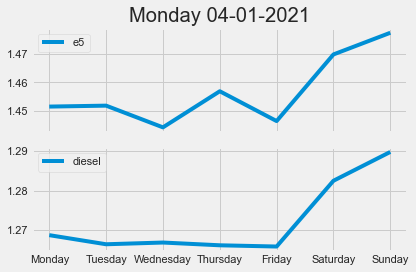

In [144]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

ax1.plot(foo.e5, label='e5')
ax1.set_title(start_date.strftime('%d-%m-%Y'))
ax1.legend()
ax1.ymin = df_merged['e5'][df_merged['e5'] > 0.1].min()
ax1.ymax = df_merged['e5'][df_merged['e5'] > 0.1].max()

ax2.plot(foo.diesel, label='diesel')
ax2.legend()

plt.tight_layout()
plt.show()

In [52]:
foo = df_merged.loc[mask]

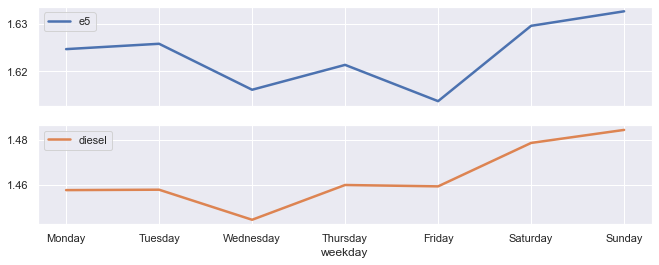

In [28]:
cols_plot = ['e5', 'diesel']
df_merged.between_time("17:00", "22:00").groupby('weekday')[cols_plot].mean().plot(subplots=True, linewidth=2.5);



In [150]:
import ipydatetime
import ipywidgets
time_picker = ipydatetime.TimePicker()
time_picker

TimePicker(value=None, step=60.0)

In [191]:
df_merged.to_csv('test.csv', encoding = 'utf-8')

In [223]:
startstring = '2020-01-27 00:00:00'
end_string = '2020-01-03 23:59:59'

start_date = pd.to_datetime(startstring, utc= True)
end_date = pd.to_datetime(end_string, utc= True)

mask = (df_merged['date'] > start_date) & (df_merged['date'] <= end_date)
mask.value_counts()
#df_merged.loc[mask]


False    621390
Name: date, dtype: int64

In [308]:
from pprint import pprint

cal = calendar.Calendar(firstweekday=0)
dates = cal.yeardatescalendar(datetime.date.today().year-1, width=1)
dates.extend(cal.yeardatescalendar(datetime.date.today().year, width=1))

for month in dates:
    for weeks in month:
        #print(weeks[0][0], weeks[-1][6])for week in weeks:
        #pprint(week)
        for week in weeks:
            print(week[0], week[-1])
            if (week[0] < date.today() and week[-1] < date.today()):
                pass
            elif (week[0] < date.today() and week[-1] > date.today()):
                print(week[0])
            else:
                break

2019-12-30 2020-01-05
2020-01-06 2020-01-12
2020-01-13 2020-01-19
2020-01-20 2020-01-26
2020-01-27 2020-02-02
2020-01-27 2020-02-02
2020-02-03 2020-02-09
2020-02-10 2020-02-16
2020-02-17 2020-02-23
2020-02-24 2020-03-01
2020-02-24 2020-03-01
2020-03-02 2020-03-08
2020-03-09 2020-03-15
2020-03-16 2020-03-22
2020-03-23 2020-03-29
2020-03-30 2020-04-05
2020-03-30 2020-04-05
2020-04-06 2020-04-12
2020-04-13 2020-04-19
2020-04-20 2020-04-26
2020-04-27 2020-05-03
2020-04-27 2020-05-03
2020-05-04 2020-05-10
2020-05-11 2020-05-17
2020-05-18 2020-05-24
2020-05-25 2020-05-31
2020-06-01 2020-06-07
2020-06-08 2020-06-14
2020-06-15 2020-06-21
2020-06-22 2020-06-28
2020-06-29 2020-07-05
2020-06-29 2020-07-05
2020-07-06 2020-07-12
2020-07-13 2020-07-19
2020-07-20 2020-07-26
2020-07-27 2020-08-02
2020-07-27 2020-08-02
2020-08-03 2020-08-09
2020-08-10 2020-08-16
2020-08-17 2020-08-23
2020-08-24 2020-08-30
2020-08-31 2020-09-06
2020-08-31 2020-09-06
2020-09-07 2020-09-13
2020-09-14 2020-09-20
2020-09-21

In [316]:
myConfig= {'Wolfsburg': {'name':'Wolfsburg', 'postCodeMin' : 38000, 'postCodeMax'  : 38999},
           'Dietzhoelztal': {'name': 'Dillkreis (Nord)', 'postCodeMin' : 35700, 'postCodeMax' : 35799}}


currentOrt = myConfig['Wolfsburg']

currentOrt['postCodeMax']

38999

In [321]:
cal = calendar.Calendar(firstweekday=0)
dates = cal.yeardatescalendar(datetime.date.today().year-1, width=1)
dates.extend(cal.yeardatescalendar(datetime.date.today().year, width=1))

myConfig= {'Wolfsburg': {'id':'WOB', 'name':'Wolfsburg', 'postCodeMin' : 38000, 'postCodeMax'  : 38999},
           'Dietzhoelztal': {'id':'LDK', 'name': 'Dillkreis (Nord)', 'postCodeMin' : 35700, 'postCodeMax' : 35799}}

currentOrt = myConfig['Wolfsburg']

filesnames = []
start_time = "18:00"
end_time = "22:00"

for month in dates:
    for weeks in month:
        #print(weeks[0][0], weeks[-1][6])
        for week in weeks:
            #  print(week)
            start_date = pd.to_datetime(weeks[0][0].strftime('%Y-%m-%d 00:00:00'), utc= True)
            end_date = pd.to_datetime(weeks[-1][6].strftime('%Y-%m-%d 23:59:59'), utc= True)
            if (week[0] < date.today() and week[-1] < date.today()):
                print(week[0])
            elif (week[0] < date.today() and week[-1] > date.today()):
                end_date = pd.to_datetime(date.today() - datetime.timedelta(days=1), utc= True)
            else:
                break
            #start_date = pd.to_datetime(week[0].strftime('%Y-%m-%d 00:00:00'), utc= True)
            #end_date = pd.to_datetime(week[-1].strftime('%Y-%m-%d 23:59:59'), utc= True)
            print(start_date, end_date)
            filename = r'cpmGasprices_'+currentOrt['id']+'_'+weeks[0][0].strftime('%Y-%m-%d')+'_'+weeks[-1][6].strftime('%Y-%m-%d')
            #filename = r'cpmGasprices_'+str(postCodeMin)+'-'+str(postCodeMax)+'_'+week[0].strftime('%Y-%m-%d')+'_'+week[-1].strftime('%Y-%m-%d')
            filesnames.append(filename)
            mask = (df_merged['date'] > start_date) & (df_merged['date'] <= end_date)
            cols_plot = ['e5', 'diesel']
            df_plot = df_merged[mask].query('postCode > '+str(currentOrt['postCodeMin'])+' & postCode < '+str(currentOrt['postCodeMax'])).between_time(start_time, end_time).groupby('weekday')[cols_plot].mean()

            #df_plot.describe()

            e5min = df_plot['e5'][df_plot['e5'] > 0.1].min()
            e5max = df_plot['e5'][df_plot['e5'] > 0.1].max()
            e5min = math.floor(e5min*100)/100
            e5max = math.ceil(e5max*100)/100
            print(e5min, e5max)

            plt.style.use('Solarize_Light2')
            px = 1/plt.rcParams['figure.dpi']  # pixel in inches
            
            serif_font = {'fontname':'Linux Biolinum'}
            plt.rcParams['font.family'] = serif_font
            colors = plt.rcParams["axes.prop_cycle"]()
            fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(640*px, 340*px))
            fig.suptitle("Benzinpreise in "+currentOrt["name"], fontsize=24, **serif_font)

            c = next(colors)["color"]
            ax1.plot(df_plot.e5, label='e5', color=c)
            #ax.set_title('v = 1',fontweight="bold", size=20) # Title
            ax1.set_title(start_date.strftime('%d-%m-%Y')+' bis '+ end_date.strftime('%d-%m-%Y') + ', zwischen '+start_time+' und '+end_time, size=12)
            ax1.legend()
            ax1.set_ylim([e5min, e5max])

            c = next(colors)["color"]
            ax2.plot(df_plot.diesel, label='diesel', color=c)
            ax2.legend()

            fig.tight_layout()
            #fig.patch.set_facecolor('#eee8d5')
            #fig.subplots_adjust(top=0.88)
            plt.savefig(filename, facecolor=fig.get_facecolor(), edgecolor='none')
            #plt.show()
            plt.close()


2019-12-30
2019-12-30 00:00:00+00:00 2020-02-02 23:59:59+00:00
1.39 1.43


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '30-12-2019 bis 02-02-2020, zwischen 18:00 und 22:00')

(1.39, 1.43)

2020-01-06
2019-12-30 00:00:00+00:00 2020-02-02 23:59:59+00:00
1.39 1.43


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '30-12-2019 bis 02-02-2020, zwischen 18:00 und 22:00')

(1.39, 1.43)

2020-01-13
2019-12-30 00:00:00+00:00 2020-02-02 23:59:59+00:00
1.39 1.43


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '30-12-2019 bis 02-02-2020, zwischen 18:00 und 22:00')

(1.39, 1.43)

2020-01-20
2019-12-30 00:00:00+00:00 2020-02-02 23:59:59+00:00
1.39 1.43


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '30-12-2019 bis 02-02-2020, zwischen 18:00 und 22:00')

(1.39, 1.43)

2020-01-27
2019-12-30 00:00:00+00:00 2020-02-02 23:59:59+00:00
1.39 1.43


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '30-12-2019 bis 02-02-2020, zwischen 18:00 und 22:00')

(1.39, 1.43)

2020-01-27
2020-01-27 00:00:00+00:00 2020-03-01 23:59:59+00:00
1.38 1.42


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '27-01-2020 bis 01-03-2020, zwischen 18:00 und 22:00')

(1.38, 1.42)

2020-02-03
2020-01-27 00:00:00+00:00 2020-03-01 23:59:59+00:00
1.38 1.42


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '27-01-2020 bis 01-03-2020, zwischen 18:00 und 22:00')

(1.38, 1.42)

2020-02-10
2020-01-27 00:00:00+00:00 2020-03-01 23:59:59+00:00
1.38 1.42


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '27-01-2020 bis 01-03-2020, zwischen 18:00 und 22:00')

(1.38, 1.42)

2020-02-17
2020-01-27 00:00:00+00:00 2020-03-01 23:59:59+00:00
1.38 1.42


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '27-01-2020 bis 01-03-2020, zwischen 18:00 und 22:00')

(1.38, 1.42)

2020-02-24
2020-01-27 00:00:00+00:00 2020-03-01 23:59:59+00:00
1.38 1.42


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '27-01-2020 bis 01-03-2020, zwischen 18:00 und 22:00')

(1.38, 1.42)

2020-02-24
2020-02-24 00:00:00+00:00 2020-04-05 23:59:59+00:00
1.24 1.31


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '24-02-2020 bis 05-04-2020, zwischen 18:00 und 22:00')

(1.24, 1.31)

2020-03-02
2020-02-24 00:00:00+00:00 2020-04-05 23:59:59+00:00
1.24 1.31


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '24-02-2020 bis 05-04-2020, zwischen 18:00 und 22:00')

(1.24, 1.31)

2020-03-09
2020-02-24 00:00:00+00:00 2020-04-05 23:59:59+00:00
1.24 1.31


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '24-02-2020 bis 05-04-2020, zwischen 18:00 und 22:00')

(1.24, 1.31)

2020-03-16
2020-02-24 00:00:00+00:00 2020-04-05 23:59:59+00:00
1.24 1.31


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '24-02-2020 bis 05-04-2020, zwischen 18:00 und 22:00')

(1.24, 1.31)

2020-03-23
2020-02-24 00:00:00+00:00 2020-04-05 23:59:59+00:00
1.24 1.31


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '24-02-2020 bis 05-04-2020, zwischen 18:00 und 22:00')

(1.24, 1.31)

2020-03-30
2020-02-24 00:00:00+00:00 2020-04-05 23:59:59+00:00
1.24 1.31


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '24-02-2020 bis 05-04-2020, zwischen 18:00 und 22:00')

(1.24, 1.31)

2020-03-30
2020-03-30 00:00:00+00:00 2020-05-03 23:59:59+00:00
1.13 1.21


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '30-03-2020 bis 03-05-2020, zwischen 18:00 und 22:00')

(1.13, 1.21)

2020-04-06
2020-03-30 00:00:00+00:00 2020-05-03 23:59:59+00:00
1.13 1.21


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '30-03-2020 bis 03-05-2020, zwischen 18:00 und 22:00')

(1.13, 1.21)

2020-04-13
2020-03-30 00:00:00+00:00 2020-05-03 23:59:59+00:00
1.13 1.21


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '30-03-2020 bis 03-05-2020, zwischen 18:00 und 22:00')

(1.13, 1.21)

2020-04-20
2020-03-30 00:00:00+00:00 2020-05-03 23:59:59+00:00
1.13 1.21


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '30-03-2020 bis 03-05-2020, zwischen 18:00 und 22:00')

(1.13, 1.21)

2020-04-27
2020-03-30 00:00:00+00:00 2020-05-03 23:59:59+00:00
1.13 1.21


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '30-03-2020 bis 03-05-2020, zwischen 18:00 und 22:00')

(1.13, 1.21)

2020-04-27
2020-04-27 00:00:00+00:00 2020-05-31 23:59:59+00:00
1.17 1.2


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '27-04-2020 bis 31-05-2020, zwischen 18:00 und 22:00')

(1.17, 1.2)

2020-05-04
2020-04-27 00:00:00+00:00 2020-05-31 23:59:59+00:00
1.17 1.2


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '27-04-2020 bis 31-05-2020, zwischen 18:00 und 22:00')

(1.17, 1.2)

2020-05-11
2020-04-27 00:00:00+00:00 2020-05-31 23:59:59+00:00
1.17 1.2


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '27-04-2020 bis 31-05-2020, zwischen 18:00 und 22:00')

(1.17, 1.2)

2020-05-18
2020-04-27 00:00:00+00:00 2020-05-31 23:59:59+00:00
1.17 1.2


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '27-04-2020 bis 31-05-2020, zwischen 18:00 und 22:00')

(1.17, 1.2)

2020-05-25
2020-04-27 00:00:00+00:00 2020-05-31 23:59:59+00:00
1.17 1.2


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '27-04-2020 bis 31-05-2020, zwischen 18:00 und 22:00')

(1.17, 1.2)

2020-06-01
2020-06-01 00:00:00+00:00 2020-07-05 23:59:59+00:00
1.26 1.3


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '01-06-2020 bis 05-07-2020, zwischen 18:00 und 22:00')

(1.26, 1.3)

2020-06-08
2020-06-01 00:00:00+00:00 2020-07-05 23:59:59+00:00
1.26 1.3


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '01-06-2020 bis 05-07-2020, zwischen 18:00 und 22:00')

(1.26, 1.3)

2020-06-15
2020-06-01 00:00:00+00:00 2020-07-05 23:59:59+00:00
1.26 1.3


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '01-06-2020 bis 05-07-2020, zwischen 18:00 und 22:00')

(1.26, 1.3)

2020-06-22
2020-06-01 00:00:00+00:00 2020-07-05 23:59:59+00:00
1.26 1.3


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '01-06-2020 bis 05-07-2020, zwischen 18:00 und 22:00')

(1.26, 1.3)

2020-06-29
2020-06-01 00:00:00+00:00 2020-07-05 23:59:59+00:00
1.26 1.3


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '01-06-2020 bis 05-07-2020, zwischen 18:00 und 22:00')

(1.26, 1.3)

2020-06-29
2020-06-29 00:00:00+00:00 2020-08-02 23:59:59+00:00
1.25 1.29


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '29-06-2020 bis 02-08-2020, zwischen 18:00 und 22:00')

(1.25, 1.29)

2020-07-06
2020-06-29 00:00:00+00:00 2020-08-02 23:59:59+00:00
1.25 1.29


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '29-06-2020 bis 02-08-2020, zwischen 18:00 und 22:00')

(1.25, 1.29)

2020-07-13
2020-06-29 00:00:00+00:00 2020-08-02 23:59:59+00:00
1.25 1.29


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '29-06-2020 bis 02-08-2020, zwischen 18:00 und 22:00')

(1.25, 1.29)

2020-07-20
2020-06-29 00:00:00+00:00 2020-08-02 23:59:59+00:00
1.25 1.29


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '29-06-2020 bis 02-08-2020, zwischen 18:00 und 22:00')

(1.25, 1.29)

2020-07-27
2020-06-29 00:00:00+00:00 2020-08-02 23:59:59+00:00
1.25 1.29


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '29-06-2020 bis 02-08-2020, zwischen 18:00 und 22:00')

(1.25, 1.29)

2020-07-27
2020-07-27 00:00:00+00:00 2020-09-06 23:59:59+00:00
1.22 1.24


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '27-07-2020 bis 06-09-2020, zwischen 18:00 und 22:00')

(1.22, 1.24)

2020-08-03
2020-07-27 00:00:00+00:00 2020-09-06 23:59:59+00:00
1.22 1.24


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '27-07-2020 bis 06-09-2020, zwischen 18:00 und 22:00')

(1.22, 1.24)

2020-08-10
2020-07-27 00:00:00+00:00 2020-09-06 23:59:59+00:00
1.22 1.24


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '27-07-2020 bis 06-09-2020, zwischen 18:00 und 22:00')

(1.22, 1.24)

2020-08-17
2020-07-27 00:00:00+00:00 2020-09-06 23:59:59+00:00
1.22 1.24


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '27-07-2020 bis 06-09-2020, zwischen 18:00 und 22:00')

(1.22, 1.24)

2020-08-24
2020-07-27 00:00:00+00:00 2020-09-06 23:59:59+00:00
1.22 1.24


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '27-07-2020 bis 06-09-2020, zwischen 18:00 und 22:00')

(1.22, 1.24)

2020-08-31
2020-07-27 00:00:00+00:00 2020-09-06 23:59:59+00:00
1.22 1.24


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '27-07-2020 bis 06-09-2020, zwischen 18:00 und 22:00')

(1.22, 1.24)

2020-08-31
2020-08-31 00:00:00+00:00 2020-10-04 23:59:59+00:00
1.23 1.25


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '31-08-2020 bis 04-10-2020, zwischen 18:00 und 22:00')

(1.23, 1.25)

2020-09-07
2020-08-31 00:00:00+00:00 2020-10-04 23:59:59+00:00
1.23 1.25


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '31-08-2020 bis 04-10-2020, zwischen 18:00 und 22:00')

(1.23, 1.25)

2020-09-14
2020-08-31 00:00:00+00:00 2020-10-04 23:59:59+00:00
1.23 1.25


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '31-08-2020 bis 04-10-2020, zwischen 18:00 und 22:00')

(1.23, 1.25)

2020-09-21
2020-08-31 00:00:00+00:00 2020-10-04 23:59:59+00:00
1.23 1.25


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '31-08-2020 bis 04-10-2020, zwischen 18:00 und 22:00')

(1.23, 1.25)

2020-09-28
2020-08-31 00:00:00+00:00 2020-10-04 23:59:59+00:00
1.23 1.25


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '31-08-2020 bis 04-10-2020, zwischen 18:00 und 22:00')

(1.23, 1.25)

2020-09-28
2020-09-28 00:00:00+00:00 2020-11-01 23:59:59+00:00
1.21 1.24


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '28-09-2020 bis 01-11-2020, zwischen 18:00 und 22:00')

(1.21, 1.24)

2020-10-05
2020-09-28 00:00:00+00:00 2020-11-01 23:59:59+00:00
1.21 1.24


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '28-09-2020 bis 01-11-2020, zwischen 18:00 und 22:00')

(1.21, 1.24)

2020-10-12
2020-09-28 00:00:00+00:00 2020-11-01 23:59:59+00:00
1.21 1.24


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '28-09-2020 bis 01-11-2020, zwischen 18:00 und 22:00')

(1.21, 1.24)

2020-10-19
2020-09-28 00:00:00+00:00 2020-11-01 23:59:59+00:00
1.21 1.24


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '28-09-2020 bis 01-11-2020, zwischen 18:00 und 22:00')

(1.21, 1.24)

2020-10-26
2020-09-28 00:00:00+00:00 2020-11-01 23:59:59+00:00
1.21 1.24


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '28-09-2020 bis 01-11-2020, zwischen 18:00 und 22:00')

(1.21, 1.24)

2020-10-26
2020-10-26 00:00:00+00:00 2020-12-06 23:59:59+00:00
1.2 1.22


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '26-10-2020 bis 06-12-2020, zwischen 18:00 und 22:00')

(1.2, 1.22)

2020-11-02
2020-10-26 00:00:00+00:00 2020-12-06 23:59:59+00:00
1.2 1.22


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '26-10-2020 bis 06-12-2020, zwischen 18:00 und 22:00')

(1.2, 1.22)

2020-11-09
2020-10-26 00:00:00+00:00 2020-12-06 23:59:59+00:00
1.2 1.22


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '26-10-2020 bis 06-12-2020, zwischen 18:00 und 22:00')

(1.2, 1.22)

2020-11-16
2020-10-26 00:00:00+00:00 2020-12-06 23:59:59+00:00
1.2 1.22


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '26-10-2020 bis 06-12-2020, zwischen 18:00 und 22:00')

(1.2, 1.22)

2020-11-23
2020-10-26 00:00:00+00:00 2020-12-06 23:59:59+00:00
1.2 1.22


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '26-10-2020 bis 06-12-2020, zwischen 18:00 und 22:00')

(1.2, 1.22)

2020-11-30
2020-10-26 00:00:00+00:00 2020-12-06 23:59:59+00:00
1.2 1.22


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '26-10-2020 bis 06-12-2020, zwischen 18:00 und 22:00')

(1.2, 1.22)

2020-11-30
2020-11-30 00:00:00+00:00 2021-01-03 23:59:59+00:00
1.24 1.32


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '30-11-2020 bis 03-01-2021, zwischen 18:00 und 22:00')

(1.24, 1.32)

2020-12-07
2020-11-30 00:00:00+00:00 2021-01-03 23:59:59+00:00
1.24 1.32


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '30-11-2020 bis 03-01-2021, zwischen 18:00 und 22:00')

(1.24, 1.32)

2020-12-14
2020-11-30 00:00:00+00:00 2021-01-03 23:59:59+00:00
1.24 1.32


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '30-11-2020 bis 03-01-2021, zwischen 18:00 und 22:00')

(1.24, 1.32)

2020-12-21
2020-11-30 00:00:00+00:00 2021-01-03 23:59:59+00:00
1.24 1.32


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '30-11-2020 bis 03-01-2021, zwischen 18:00 und 22:00')

(1.24, 1.32)

2020-12-28
2020-11-30 00:00:00+00:00 2021-01-03 23:59:59+00:00
1.24 1.32


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '30-11-2020 bis 03-01-2021, zwischen 18:00 und 22:00')

(1.24, 1.32)

2020-12-28
2020-12-28 00:00:00+00:00 2021-01-31 23:59:59+00:00
1.34 1.42


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '28-12-2020 bis 31-01-2021, zwischen 18:00 und 22:00')

(1.34, 1.42)

2021-01-04
2020-12-28 00:00:00+00:00 2021-01-31 23:59:59+00:00
1.34 1.42


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '28-12-2020 bis 31-01-2021, zwischen 18:00 und 22:00')

(1.34, 1.42)

2021-01-11
2020-12-28 00:00:00+00:00 2021-01-31 23:59:59+00:00
1.34 1.42


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '28-12-2020 bis 31-01-2021, zwischen 18:00 und 22:00')

(1.34, 1.42)

2021-01-18
2020-12-28 00:00:00+00:00 2021-01-31 23:59:59+00:00
1.34 1.42


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '28-12-2020 bis 31-01-2021, zwischen 18:00 und 22:00')

(1.34, 1.42)

2021-01-25
2020-12-28 00:00:00+00:00 2021-01-31 23:59:59+00:00
1.34 1.42


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '28-12-2020 bis 31-01-2021, zwischen 18:00 und 22:00')

(1.34, 1.42)

2021-02-01
2021-02-01 00:00:00+00:00 2021-02-28 23:59:59+00:00
1.41 1.48


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '01-02-2021 bis 28-02-2021, zwischen 18:00 und 22:00')

(1.41, 1.48)

2021-02-08
2021-02-01 00:00:00+00:00 2021-02-28 23:59:59+00:00
1.41 1.48


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '01-02-2021 bis 28-02-2021, zwischen 18:00 und 22:00')

(1.41, 1.48)

2021-02-15
2021-02-01 00:00:00+00:00 2021-02-28 23:59:59+00:00
1.41 1.48


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '01-02-2021 bis 28-02-2021, zwischen 18:00 und 22:00')

(1.41, 1.48)

2021-02-22
2021-02-01 00:00:00+00:00 2021-02-28 23:59:59+00:00
1.41 1.48


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '01-02-2021 bis 28-02-2021, zwischen 18:00 und 22:00')

(1.41, 1.48)

2021-03-01
2021-03-01 00:00:00+00:00 2021-04-04 23:59:59+00:00
1.45 1.51


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '01-03-2021 bis 04-04-2021, zwischen 18:00 und 22:00')

(1.45, 1.51)

2021-03-08
2021-03-01 00:00:00+00:00 2021-04-04 23:59:59+00:00
1.45 1.51


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '01-03-2021 bis 04-04-2021, zwischen 18:00 und 22:00')

(1.45, 1.51)

2021-03-15
2021-03-01 00:00:00+00:00 2021-04-04 23:59:59+00:00
1.45 1.51


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '01-03-2021 bis 04-04-2021, zwischen 18:00 und 22:00')

(1.45, 1.51)

2021-03-22
2021-03-01 00:00:00+00:00 2021-04-04 23:59:59+00:00
1.45 1.51


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '01-03-2021 bis 04-04-2021, zwischen 18:00 und 22:00')

(1.45, 1.51)

2021-03-29
2021-03-01 00:00:00+00:00 2021-04-04 23:59:59+00:00
1.45 1.51


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '01-03-2021 bis 04-04-2021, zwischen 18:00 und 22:00')

(1.45, 1.51)

2021-03-29
2021-03-29 00:00:00+00:00 2021-05-02 23:59:59+00:00
1.48 1.5


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '29-03-2021 bis 02-05-2021, zwischen 18:00 und 22:00')

(1.48, 1.5)

2021-04-05
2021-03-29 00:00:00+00:00 2021-05-02 23:59:59+00:00
1.48 1.5


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '29-03-2021 bis 02-05-2021, zwischen 18:00 und 22:00')

(1.48, 1.5)

2021-04-12
2021-03-29 00:00:00+00:00 2021-05-02 23:59:59+00:00
1.48 1.5


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '29-03-2021 bis 02-05-2021, zwischen 18:00 und 22:00')

(1.48, 1.5)

2021-04-19
2021-03-29 00:00:00+00:00 2021-05-02 23:59:59+00:00
1.48 1.5


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '29-03-2021 bis 02-05-2021, zwischen 18:00 und 22:00')

(1.48, 1.5)

2021-04-26
2021-03-29 00:00:00+00:00 2021-05-02 23:59:59+00:00
1.48 1.5


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '29-03-2021 bis 02-05-2021, zwischen 18:00 und 22:00')

(1.48, 1.5)

2021-04-26
2021-04-26 00:00:00+00:00 2021-06-06 23:59:59+00:00
1.49 1.51


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '26-04-2021 bis 06-06-2021, zwischen 18:00 und 22:00')

(1.49, 1.51)

2021-05-03
2021-04-26 00:00:00+00:00 2021-06-06 23:59:59+00:00
1.49 1.51


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '26-04-2021 bis 06-06-2021, zwischen 18:00 und 22:00')

(1.49, 1.51)

2021-05-10
2021-04-26 00:00:00+00:00 2021-06-06 23:59:59+00:00
1.49 1.51


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '26-04-2021 bis 06-06-2021, zwischen 18:00 und 22:00')

(1.49, 1.51)

2021-05-17
2021-04-26 00:00:00+00:00 2021-06-06 23:59:59+00:00
1.49 1.51


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '26-04-2021 bis 06-06-2021, zwischen 18:00 und 22:00')

(1.49, 1.51)

2021-05-24
2021-04-26 00:00:00+00:00 2021-06-06 23:59:59+00:00
1.49 1.51


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '26-04-2021 bis 06-06-2021, zwischen 18:00 und 22:00')

(1.49, 1.51)

2021-05-31
2021-04-26 00:00:00+00:00 2021-06-06 23:59:59+00:00
1.49 1.51


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '26-04-2021 bis 06-06-2021, zwischen 18:00 und 22:00')

(1.49, 1.51)

2021-05-31
2021-05-31 00:00:00+00:00 2021-07-04 23:59:59+00:00
1.51 1.56


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '31-05-2021 bis 04-07-2021, zwischen 18:00 und 22:00')

(1.51, 1.56)

2021-06-07
2021-05-31 00:00:00+00:00 2021-07-04 23:59:59+00:00
1.51 1.56


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '31-05-2021 bis 04-07-2021, zwischen 18:00 und 22:00')

(1.51, 1.56)

2021-06-14
2021-05-31 00:00:00+00:00 2021-07-04 23:59:59+00:00
1.51 1.56


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '31-05-2021 bis 04-07-2021, zwischen 18:00 und 22:00')

(1.51, 1.56)

2021-06-21
2021-05-31 00:00:00+00:00 2021-07-04 23:59:59+00:00
1.51 1.56


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '31-05-2021 bis 04-07-2021, zwischen 18:00 und 22:00')

(1.51, 1.56)

2021-06-28
2021-05-31 00:00:00+00:00 2021-07-04 23:59:59+00:00
1.51 1.56


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '31-05-2021 bis 04-07-2021, zwischen 18:00 und 22:00')

(1.51, 1.56)

2021-06-28
2021-06-28 00:00:00+00:00 2021-08-01 23:59:59+00:00
1.54 1.59


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '28-06-2021 bis 01-08-2021, zwischen 18:00 und 22:00')

(1.54, 1.59)

2021-07-05
2021-06-28 00:00:00+00:00 2021-08-01 23:59:59+00:00
1.54 1.59


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '28-06-2021 bis 01-08-2021, zwischen 18:00 und 22:00')

(1.54, 1.59)

2021-07-12
2021-06-28 00:00:00+00:00 2021-08-01 23:59:59+00:00
1.54 1.59


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '28-06-2021 bis 01-08-2021, zwischen 18:00 und 22:00')

(1.54, 1.59)

2021-07-19
2021-06-28 00:00:00+00:00 2021-08-01 23:59:59+00:00
1.54 1.59


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '28-06-2021 bis 01-08-2021, zwischen 18:00 und 22:00')

(1.54, 1.59)

2021-07-26
2021-06-28 00:00:00+00:00 2021-08-01 23:59:59+00:00
1.54 1.59


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '28-06-2021 bis 01-08-2021, zwischen 18:00 und 22:00')

(1.54, 1.59)

2021-07-26
2021-07-26 00:00:00+00:00 2021-09-05 23:59:59+00:00
1.56 1.62


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '26-07-2021 bis 05-09-2021, zwischen 18:00 und 22:00')

(1.56, 1.62)

2021-08-02
2021-07-26 00:00:00+00:00 2021-09-05 23:59:59+00:00
1.56 1.62


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '26-07-2021 bis 05-09-2021, zwischen 18:00 und 22:00')

(1.56, 1.62)

2021-08-09
2021-07-26 00:00:00+00:00 2021-09-05 23:59:59+00:00
1.56 1.62


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '26-07-2021 bis 05-09-2021, zwischen 18:00 und 22:00')

(1.56, 1.62)

2021-08-16
2021-07-26 00:00:00+00:00 2021-09-05 23:59:59+00:00
1.56 1.62


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '26-07-2021 bis 05-09-2021, zwischen 18:00 und 22:00')

(1.56, 1.62)

2021-08-23
2021-07-26 00:00:00+00:00 2021-09-05 23:59:59+00:00
1.56 1.62


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '26-07-2021 bis 05-09-2021, zwischen 18:00 und 22:00')

(1.56, 1.62)

2021-08-30
2021-07-26 00:00:00+00:00 2021-09-05 23:59:59+00:00
1.56 1.62


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '26-07-2021 bis 05-09-2021, zwischen 18:00 und 22:00')

(1.56, 1.62)

2021-08-30
2021-08-30 00:00:00+00:00 2021-10-03 23:59:59+00:00
1.58 1.62


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '30-08-2021 bis 03-10-2021, zwischen 18:00 und 22:00')

(1.58, 1.62)

2021-09-06
2021-08-30 00:00:00+00:00 2021-10-03 23:59:59+00:00
1.58 1.62


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '30-08-2021 bis 03-10-2021, zwischen 18:00 und 22:00')

(1.58, 1.62)

2021-09-13
2021-08-30 00:00:00+00:00 2021-10-03 23:59:59+00:00
1.58 1.62


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '30-08-2021 bis 03-10-2021, zwischen 18:00 und 22:00')

(1.58, 1.62)

2021-09-20
2021-08-30 00:00:00+00:00 2021-10-03 23:59:59+00:00
1.58 1.62


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '30-08-2021 bis 03-10-2021, zwischen 18:00 und 22:00')

(1.58, 1.62)

2021-09-27
2021-08-30 00:00:00+00:00 2021-10-03 23:59:59+00:00
1.58 1.62


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '30-08-2021 bis 03-10-2021, zwischen 18:00 und 22:00')

(1.58, 1.62)

2021-09-27
2021-09-27 00:00:00+00:00 2021-10-31 23:59:59+00:00
1.66 1.7


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '27-09-2021 bis 31-10-2021, zwischen 18:00 und 22:00')

(1.66, 1.7)

2021-10-04
2021-09-27 00:00:00+00:00 2021-10-31 23:59:59+00:00
1.66 1.7


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '27-09-2021 bis 31-10-2021, zwischen 18:00 und 22:00')

(1.66, 1.7)

2021-10-11
2021-09-27 00:00:00+00:00 2021-10-31 23:59:59+00:00
1.66 1.7


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '27-09-2021 bis 31-10-2021, zwischen 18:00 und 22:00')

(1.66, 1.7)

2021-10-18
2021-09-27 00:00:00+00:00 2021-10-31 23:59:59+00:00
1.66 1.7


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '27-09-2021 bis 31-10-2021, zwischen 18:00 und 22:00')

(1.66, 1.7)

2021-09-27 00:00:00+00:00 2021-10-29 00:00:00+00:00
1.66 1.7


Text(0.5, 0.98, 'Benzinpreise in Wolfsburg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, '27-09-2021 bis 29-10-2021, zwischen 18:00 und 22:00')

(1.66, 1.7)

In [310]:
df_plot

,e5,diesel
weekday,,
Monday,1.665494,1.515642
Tuesday,1.665797,1.475169
Wednesday,1.678173,1.492309
Thursday,1.668140,1.490499
Friday,1.677664,1.490986
Saturday,1.687852,1.520541
Sunday,1.697567,1.524733
